# Dependencias

In [73]:
# Carga y manipulación de datos
import pandas as pd
import numpy as np
import os

# Valores nulos
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Visualizacion
import matplotlib.pyplot as plt
import plotly.express as px

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Modelado
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow.keras.utils as keras_utils

# Evaluación
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


# Funciones

## Gráficas de barras (histogramas) análisis univariado

In [74]:
def generar_grafica_barras_univariado(df, columna):

    # Verificamos si es númerica la columna y la convertimos
    if df[columna].apply(lambda x: str(x).replace('.', '', 1).isdigit() if pd.notnull(x) else False).all():
        df[columna] = pd.to_numeric(df[columna])

    # Generamos el df a graficar
    df_conteo = df[columna].value_counts().reset_index().sort_values(columna).reset_index(drop=True)
    total = df_conteo['count'].sum()
    df_conteo['percentage'] = (df_conteo['count'] / total * 100).round(2)
    df_conteo['text'] = df_conteo['count'].astype(str) + ' (' + df_conteo['percentage'].astype(str) + '%)'

    # Generamos la gráfica
    fig = px.bar(df_conteo, x=columna, y='count', text='text', title=f'Número de reservaciones por {columna}')

    # Personalizamos la barras y el texto
    fig.update_traces(marker_color='#FF6F61', textfont_size=12,textposition='outside')

    # Personalizamos el fondo y diseño general 
    fig.update_layout(
    plot_bgcolor='#222222',  # Fondo negro de la gráfica
    paper_bgcolor='#222222',  # Fondo negro de todo el gráfico
    font=dict(color='white', size=14),  # Texto en blanco
    xaxis=dict(gridcolor='#444444'),  # Cuadrícula en gris claro
    yaxis=dict(gridcolor='#444444'),  
    title=dict(font=dict(size=18)),  # Tamaño del título
    xaxis_title=columna, 
    yaxis_title=columna)

    # Actualizamos el alto de la gráfica
    fig.update_layout(yaxis=dict(range=[0, df_conteo['count'].max() * 1.2]))
    fig.update_xaxes(tickmode='linear')

    # Modificamos el alto si solo se tienen dos columnas
    if df_conteo.shape[0] == 2:
        fig.update_layout(width=600) 
    else: 
        # Agregar fuente
        fig.add_annotation( text="Fuente: Datos originales", xref="paper", yref="paper", x=0, y=-0.15, showarrow=False, font=dict(color='white', size=12))
    

    return fig

## Gráfica de violín análisis bivariado

In [75]:
def generar_grafico_violin_bivariado(df, columna_x, columna_y):

    fig = px.violin(df, x=columna_x, y=columna_y, box=True, title=f"{columna_x} por {columna_y}")

    # Modificamos el color de las cajas y las líneas
    fig.update_traces(line_color='#4DB6AC', fillcolor='#80CBC4',box_line_color='#004D40', meanline_color='#004D40', marker=dict(color='white', size=6))

    # Personalizamos el fondo y diseño general
    fig.update_layout(
    plot_bgcolor='#222222',  # Fondo negro de la gráfica
    paper_bgcolor='#222222',  # Fondo negro del papel
    font=dict(color='white', size=14),  # Texto blanco
    xaxis=dict(gridcolor='#444444'),  # Cuadrícula gris claro
    yaxis=dict(gridcolor='#444444'),
    title=dict(font=dict(size=18)),  # Tamaño del título
    xaxis_title=columna_x, 
    yaxis_title=columna_y)

    # Añadimos la fuente
    fig.add_annotation(
    text="Fuente: Datos originales", xref="paper", yref="paper", x=0, y=-0.15, showarrow=False, font=dict(color='white', size=12))
    
    return fig

## Gráfico de barras apiladas análisis bivariable

In [76]:
def generar_grafico_barras_apiladas_bivariado(df, column_x, column_y):

    # Creamos la grafica
    fig = px.histogram( df, x=column_x, color=column_y, barmode='stack', 
                        title=f"Distribución de {column_x} por {column_y}",
                        color_discrete_sequence=["#388E3C", "#81C784"], text_auto=True)
    
    # Personalizamos el fondo y diseño general
    fig.update_layout(
    plot_bgcolor='#222222',  # Fondo negro de la gráfica
    paper_bgcolor='#222222',  # Fondo negro del papel
    font=dict(color='white', size=14),  # Texto blanco
    xaxis=dict(gridcolor='#444444'),  # Cuadrícula gris claro
    yaxis=dict(gridcolor='#444444'),
    title=dict(font=dict(size=18)),  # Tamaño del título
    xaxis_title=column_x, 
    yaxis_title=column_y)

    # Modificamos el alto si solo se tienen dos columnas
    if df[column_x].nunique() == 2:
        fig.update_layout(width=600) 
    else:
        # Agregar una anotación de fuente
        fig.add_annotation(text="Fuente: Datos originales", xref="paper", yref="paper", x=0, y=-0.15, showarrow=False, font=dict(color='white', size=12))
    

    return fig

## Gráfica de dispersión análisis bivariado

In [77]:
def generar_grafica_dispersion_bivariado(df, columna_x, columna_y, color):

    # Crear el gráfico de dispersión
    fig = px.scatter(df, x=columna_x, y=columna_y, color=color, title=f"{columna_x} vs {columna_y} por {color}")
    
    # Personalizar el fondo y diseño general
    fig.update_layout(
        plot_bgcolor='#222222',  # Fondo negro de la gráfica
        paper_bgcolor='#222222',  # Fondo negro del papel
        font=dict(color='white', size=14),  # Texto blanco
        xaxis=dict(gridcolor='#444444'),  # Cuadrícula gris claro para el eje X
        yaxis=dict(gridcolor='#444444'), 
        title=dict(font=dict(size=18)))  # Tamaño del título

    # Agregar una anotación de fuente
    fig.add_annotation(text="Fuente: Datos originales",  xref="paper", yref="paper", x=0, y=-0.15, showarrow=False, font=dict(color='white', size=12))

    return fig

## Gráfica valores imputados

In [78]:
def comparar_imputacion(df, df_imp, columna):
    original_age_counts = df[columna].value_counts().reset_index()
    original_age_counts.columns = [columna, 'Frecuencia']
    original_age_counts['Fuente'] = 'Original'

    imputed_age_counts = df_imp[columna].value_counts().reset_index()
    imputed_age_counts.columns = [columna, 'Frecuencia']
    imputed_age_counts['Fuente'] = 'Imputado'

    # Combinar ambas frecuencias en un solo DataFrame
    combined_age_counts = pd.concat([original_age_counts, imputed_age_counts], ignore_index=True)
    combined_age_counts = combined_age_counts.sort_values(columna)

    # Crear el gráfico de barras para comparar frecuencias
    fig = px.bar(combined_age_counts, x=columna, y='Frecuencia', color='Fuente',
                barmode='group', title=f'Comparación de Frecuencias de {columna}: Original vs Imputado')

    # Actualizar etiquetas del gráfico
    fig.update_layout(xaxis_title=columna, yaxis_title='Número de Clientes')

    return fig

# Lectura de datos

In [79]:
# Directorio donde se encuentra el archivo de texto
directory = os.path.join(os.getcwd(), 'data')
file_path = os.path.join(directory, 'train_data.txt')

with open(file_path, 'r') as f:
    lines = f.readlines()

# Eliminamos el [1] y quitamos espacios   
lines = [line.replace('[1]', '').strip() for line in lines]

# Eliminamos las lineas que empiezan con 'Record'
data_l = [line for line in lines if "Record" not in line]

# Agrupamos los datos en las 7 variables
data = []
num_cols = 7

for i in range(0, len(data_l), num_cols):
    sublist = data_l[i:i+num_cols]
    data.append(sublist)

# Creamos el df con los nombres de las columnas
#columns = ['ID', 'durationOfStay', 'gender', 'age', 'kids', 'destinationCode', 'acomType']
columns = ['ID', 'Duración_Estancia', 'Género', 'Edad', 'Niños', 'Destino', 'Alojamiento']
df = pd.DataFrame(data, columns=columns)

# Exportamos el archivo como csv para no tener que hacer esta lectura de datos cada vez
#df.to_csv(os.path.join(directory, 'train_data.csv'), index=False)

df


,ID,Duración_Estancia,Género,Edad,Niños,Destino,Alojamiento
0,1010286,7,F,40,0,SE,Apt
1,1000152,5,M,<NA>,0,<NA>,Apt
2,1009019,4,F,39,1,ES,Hotel
3,1007840,5,F,45,0,NL,Hotel
4,1006939,5,M,45,1,UK,Hotel
...,...,...,...,...,...,...,...
9863,1002141,2,F,42,0,ES,Apt
9864,1009145,6,M,43,1,DK,Apt
9865,1008594,4,M,39,0,IT,Hotel
9866,1007938,3,M,37,1,IT,Hotel


# Valores nulos

In [80]:
# Reemplazamos los valores <NA> por np.nan
df = df.replace([pd.NA, '<NA>', None], np.nan)
df

,ID,Duración_Estancia,Género,Edad,Niños,Destino,Alojamiento
0,1010286,7,F,40,0,SE,Apt
1,1000152,5,M,NaN,0,NaN,Apt
2,1009019,4,F,39,1,ES,Hotel
3,1007840,5,F,45,0,NL,Hotel
4,1006939,5,M,45,1,UK,Hotel
...,...,...,...,...,...,...,...
9863,1002141,2,F,42,0,ES,Apt
9864,1009145,6,M,43,1,DK,Apt
9865,1008594,4,M,39,0,IT,Hotel
9866,1007938,3,M,37,1,IT,Hotel


In [81]:
# Contar porncetaje de nulos por columna
df.isna().mean() * 100

ID                    0.000000
Duración_Estancia     0.000000
Género                0.000000
Edad                 10.072963
Niños                 9.839887
Destino              10.093231
Alojamiento           0.000000
dtype: float64

<Axes: >

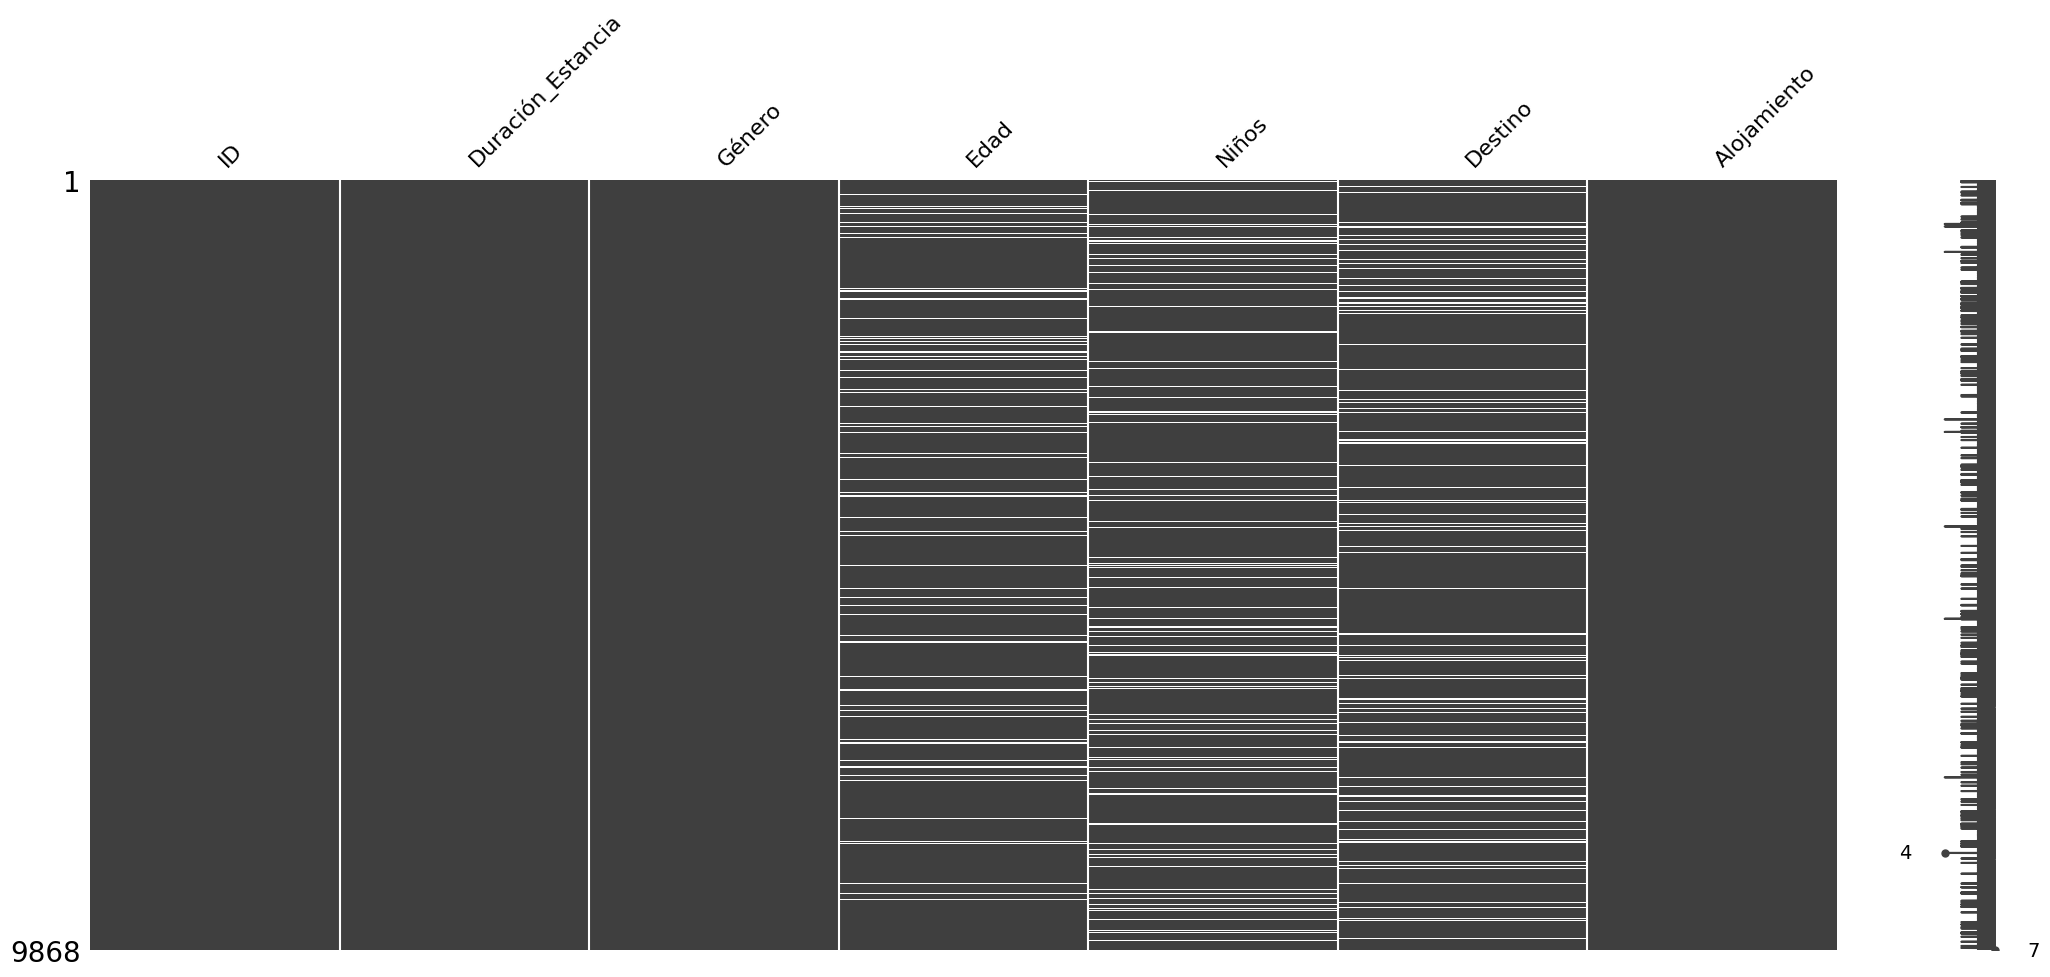

In [82]:
# Visualizamos los datos faltantes de forma gráfica con missingno
msno.matrix(df)

### Comentarios

La visualización de datos faltantes con la herramienta missingno ofrece una forma clara y concisa de identificar la distribución de valores ausentes en el dataset. En esta matriz, se observa que las variables como Edad, Niños y Destino contienen un porcentaje significativo de valores faltantes, mientras que otras columnas, como ID, Duración_Estancia, Género y Alojamiento, están completas. Este análisis es crucial para determinar las estrategias de manejo de los datos faltantes. Más adelante, se procedió a la imputación de los valores ausentes utilizando técnicas adecuadas según el tipo de variable, asegurando así la integridad y completitud del dataset para un análisis más robusto.

In [83]:
# Tipos de datos
df.dtypes

ID                   object
Duración_Estancia    object
Género               object
Edad                 object
Niños                object
Destino              object
Alojamiento          object
dtype: object

In [84]:
df

,ID,Duración_Estancia,Género,Edad,Niños,Destino,Alojamiento
0,1010286,7,F,40,0,SE,Apt
1,1000152,5,M,NaN,0,NaN,Apt
2,1009019,4,F,39,1,ES,Hotel
3,1007840,5,F,45,0,NL,Hotel
4,1006939,5,M,45,1,UK,Hotel
...,...,...,...,...,...,...,...
9863,1002141,2,F,42,0,ES,Apt
9864,1009145,6,M,43,1,DK,Apt
9865,1008594,4,M,39,0,IT,Hotel
9866,1007938,3,M,37,1,IT,Hotel


In [85]:
# Convertir a numérico
df['Duración_Estancia'] = pd.to_numeric(df['Duración_Estancia'], errors='coerce')
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')
df['Niños'] = pd.to_numeric(df['Niños'], errors='coerce')

In [86]:
df.dtypes

ID                    object
Duración_Estancia      int64
Género                object
Edad                 float64
Niños                float64
Destino               object
Alojamiento           object
dtype: object

# EDA

## Análisis univariable

In [87]:
columns_plots = columns.copy()
columns_plots.remove("ID") 

for col in columns_plots:
    try:
        g = generar_grafica_barras_univariado(df, col)
        g.show()
    except:
        print(f"No se ha podido crear la grafica de {col}")

### Comentarios

Las gráficas presentadas permiten observar la distribución de las principales variables relacionadas con las reservaciones. 

- En términos de duración de estancia, la mayoría de los clientes prefieren estadías de 3 a 4 días, indicando una tendencia hacia viajes cortos o de mediana duración. 

- En cuanto a género, la distribución está balanceada, mostrando que los servicios atraen tanto a hombres como a mujeres por igual. 
- La variable de edad revela que el público principal se encuentra entre los 35 y 46 años, posiblemente debido a su capacidad adquisitiva y disposición para viajar. 
- Asimismo, la proporción entre reservaciones con y sin niños es muy cercana, lo que refleja un equilibrio entre familias y viajeros sin hijos. 
- Respecto a los destinos, la distribución es uniforme, indicando una demanda estable para cada ubicación ofrecida. 
- Finalmente, la preferencia por alojamientos tipo hotel frente a apartamentos destaca una inclinación hacia servicios más tradicionales y con comodidades adicionales, aunque los apartamentos también representan una parte significativa del mercado. 

En conjunto, estas visualizaciones brindan una base sólida para entender el comportamiento de los clientes y orientar decisiones estratégicas.

## Análisis Bivariado

### Gráfico de violín

In [88]:
pares_violin = [
    ('Alojamiento', 'Duración_Estancia'),
    ('Alojamiento', 'Edad'),
    ('Género', 'Duración_Estancia'),
    ('Género', 'Edad'),
    ('Niños', 'Duración_Estancia'),
    ('Destino', 'Duración_Estancia'),
    ('Destino', 'Edad'),
]

In [89]:
for x, y in pares_violin:
    fig = generar_grafico_violin_bivariado(df,x,y)
    fig.show()

### Comentarios

Las gráficas bivariadas muestran distribuciones y relaciones entre diferentes variables clave del análisis. 

- En la comparación de tipos de alojamiento por duración de estancia, tanto los apartamentos como los hoteles presentan una distribución similar, pero con ligeras variaciones en la dispersión hacia estancias más largas. 

- Respecto a la edad por alojamiento, las distribuciones tienen formas casi idénticas, indicando que la preferencia por un tipo de alojamiento no está particularmente influenciada por la edad. 

- Por género, tanto hombres como mujeres muestran distribuciones similares en la duración de estancia y edad, sin diferencias notables en la forma o dispersión de los datos. 

- Las gráficas también revelan que las estancias con o sin niños tienen patrones de duración comparables, pero con una ligera dispersión hacia estancias más largas en las reservaciones con niños. 

- Por último, la relación entre destino y las variables de duración de estancia y edad refleja una distribución consistente en todos los casos, sin indicios de que algún destino en particular atraiga a un perfil demográfico específico. 

Estas gráficas destacan una notable homogeneidad en las relaciones entre las variables analizadas.

### Gráficos de barras apilados

In [90]:
pares_apiladas = [
 ('Género', 'Alojamiento'), 
 ('Niños', 'Alojamiento'),  
 ('Destino', 'Alojamiento'),  
 ('Género', 'Niños'),  
 ('Destino', 'Género')
]

In [91]:
for x, y in pares_apiladas:
    fig = generar_grafico_barras_apiladas_bivariado(df,x,y)
    fig.show()

### Comentarios
Las gráficas apiladas permiten analizar la distribución conjunta de dos variables categóricas, facilitando la identificación de patrones entre segmentos. 

- En términos de género y tipo de alojamiento, se observa que tanto mujeres como hombres muestran una preferencia equilibrada por apartamentos y hoteles, sin diferencias significativas. 

- Al analizar la distribución de niños por tipo de alojamiento, se aprecia una ligera tendencia hacia los hoteles en ambos tipos de familias.

- En el caso de los destinos, la preferencia por hoteles o apartamentos se mantiene relativamente uniforme en todas las ubicaciones, reflejando consistencia en el comportamiento del cliente independientemente del destino. 

- Por último, la distribución de género y niños también es balanceada, mostrando que hombres y mujeres participan de manera similar en reservaciones con o sin niños. 

Estos patrones consistentes indican una homogeneidad en las preferencias, lo que sugiere que las estrategias pueden enfocarse en abordar estos segmentos de manera general sin necesidad de personalización exhaustiva.

# Imputación de datos

### Valores faltantes provisional

In [94]:
"""
df['Edad'] = df['Edad'].fillna(df['Edad'].median())

moda_destino = df['Destino'].mode()[0]  # Encuentra la moda
df['Destino'] = df['Destino'].fillna(moda_destino)

df['Niños'] = df['Niños'].fillna(0).astype(int)
"""

"\ndf['Edad'] = df['Edad'].fillna(df['Edad'].median())\n\nmoda_destino = df['Destino'].mode()[0]  # Encuentra la moda\ndf['Destino'] = df['Destino'].fillna(moda_destino)\n\ndf['Niños'] = df['Niños'].fillna(0).astype(int)\n"

### Imputamos edad y niños

In [95]:
df.head()

,ID,Duración_Estancia,Género,Edad,Niños,Destino,Alojamiento
0,1010286,7,F,40.0,0.0,SE,Apt
1,1000152,5,M,NaN,0.0,NaN,Apt
2,1009019,4,F,39.0,1.0,ES,Hotel
3,1007840,5,F,45.0,0.0,NL,Hotel
4,1006939,5,M,45.0,1.0,UK,Hotel


In [96]:
# Convertir columnas categóricas a numéricas
label_encoders = {}
for col in ['Género', 'Alojamiento']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,ID,Duración_Estancia,Género,Edad,Niños,Destino,Alojamiento
0,1010286,7,0,40.0,0.0,SE,0
1,1000152,5,1,NaN,0.0,NaN,0
2,1009019,4,0,39.0,1.0,ES,1
3,1007840,5,0,45.0,0.0,NL,1
4,1006939,5,1,45.0,1.0,UK,1


In [97]:
# Seleccionar las columnas
columns_to_impute = ['Duración_Estancia', 'Género', 'Edad', 'Niños', 'Alojamiento']

df_to_impute = df[columns_to_impute]

# Crear un imputador
imputer = KNNImputer(n_neighbors=3)

# Aplicar la imputación
df_imp = pd.DataFrame(imputer.fit_transform(df_to_impute), columns=df_to_impute.columns, index=df_to_impute.index)


In [98]:
df_imp

,Duración_Estancia,Género,Edad,Niños,Alojamiento
0,7.0,0.0,40.000000,0.0,0.0
1,5.0,1.0,39.666667,0.0,0.0
2,4.0,0.0,39.000000,1.0,1.0
3,5.0,0.0,45.000000,0.0,1.0
4,5.0,1.0,45.000000,1.0,1.0
...,...,...,...,...,...
9863,2.0,0.0,42.000000,0.0,0.0
9864,6.0,1.0,43.000000,1.0,0.0
9865,4.0,1.0,39.000000,0.0,1.0
9866,3.0,1.0,37.000000,1.0,1.0


In [99]:
print(df_to_impute.isnull().sum())
print(df_imp.isnull().sum())  # Confirmar que no hay valores faltantes

Duración_Estancia      0
Género                 0
Edad                 994
Niños                971
Alojamiento            0
dtype: int64
Duración_Estancia    0
Género               0
Edad                 0
Niños                0
Alojamiento          0
dtype: int64


In [100]:
#Redondea la edad
df_imp['Edad'] = df_imp['Edad'].round()

#Convertir la edad a entero
df_imp['Edad'] = df_imp['Edad'].astype(int)

f_edad = comparar_imputacion(df, df_imp, 'Edad')
f_edad.show() 

In [101]:
#Redondea la edad
df_imp['Niños'] = df_imp['Niños'].round()

#Convertir la edad a entero
df_imp['Niños'] = df_imp['Niños'].astype(int)

f_ninos = comparar_imputacion(df, df_imp, 'Niños')
f_ninos.show()

In [102]:
# Pegale la columna de destino
df_imp['Destino'] = df['Destino']
df_imp.head()

,Duración_Estancia,Género,Edad,Niños,Alojamiento,Destino
0,7.0,0.0,40,0,0.0,SE
1,5.0,1.0,40,0,0.0,NaN
2,4.0,0.0,39,1,1.0,ES
3,5.0,0.0,45,0,1.0,NL
4,5.0,1.0,45,1,1.0,UK


### Imputamos destino

In [103]:
# Crear una copia del DataFrame original
df_destino = df_imp.copy()

# Convertir la columna 'Destino' a valores numéricos en df_destino
label_encoder = LabelEncoder()
df_destino['Destino_numeric'] = df_destino['Destino']  # Crear la columna con los valores originales
df_destino.loc[df_destino['Destino'].notna(), 'Destino_numeric'] = label_encoder.fit_transform(df_destino['Destino'].dropna().astype(str))


# Seleccionar todas las columnas como predictores
columns_to_impute = df_destino.columns.drop('Destino')  # Excluir la original 'Destino'

# Imputar 'Destino_numeric' usando IterativeImputer con todas las variables
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)

df_destino_imputed = pd.DataFrame(imputer.fit_transform(df_destino[columns_to_impute]), 
                                  columns=columns_to_impute, index=df_destino.index)

# Reemplazar la columna imputada en df_destino
df_destino['Destino_numeric'] = df_destino_imputed['Destino_numeric']

/Users/fernando_dalai/Library/Python/3.9/lib/python/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [104]:
# Restaurar las categorías originales en 'Destino'
df_destino['Destino'] = label_encoder.inverse_transform(df_destino['Destino_numeric'].round().astype(int))
df_destino

,Duración_Estancia,Género,Edad,Niños,Alojamiento,Destino,Destino_numeric
0,7.0,0.0,40,0,0.0,SE,6.000000
1,5.0,1.0,40,0,0.0,FI,2.802002
2,4.0,0.0,39,1,1.0,ES,2.000000
3,5.0,0.0,45,0,1.0,NL,5.000000
4,5.0,1.0,45,1,1.0,UK,7.000000
...,...,...,...,...,...,...,...
9863,2.0,0.0,42,0,0.0,ES,2.000000
9864,6.0,1.0,43,1,0.0,DK,1.000000
9865,4.0,1.0,39,0,1.0,IT,4.000000
9866,3.0,1.0,37,1,1.0,IT,4.000000


In [105]:
f_destino = comparar_imputacion(df, df_destino, 'Destino')
f_destino.show()

In [106]:
#Asgina la columna de ID
df_destino['ID'] = df['ID']

df_model = df_destino.copy()

#Borrar la columna de destino
df_model = df_model.drop(columns='Destino_numeric')

df_model

,Duración_Estancia,Género,Edad,Niños,Alojamiento,Destino,ID
0,7.0,0.0,40,0,0.0,SE,1010286
1,5.0,1.0,40,0,0.0,FI,1000152
2,4.0,0.0,39,1,1.0,ES,1009019
3,5.0,0.0,45,0,1.0,NL,1007840
4,5.0,1.0,45,1,1.0,UK,1006939
...,...,...,...,...,...,...,...
9863,2.0,0.0,42,0,0.0,ES,1002141
9864,6.0,1.0,43,1,0.0,DK,1009145
9865,4.0,1.0,39,0,1.0,IT,1008594
9866,3.0,1.0,37,1,1.0,IT,1007938


In [107]:
df = df_model.copy()

# Modelo

## Convertir columnas categoricas a numéricas

In [108]:
df

,Duración_Estancia,Género,Edad,Niños,Alojamiento,Destino,ID
0,7.0,0.0,40,0,0.0,SE,1010286
1,5.0,1.0,40,0,0.0,FI,1000152
2,4.0,0.0,39,1,1.0,ES,1009019
3,5.0,0.0,45,0,1.0,NL,1007840
4,5.0,1.0,45,1,1.0,UK,1006939
...,...,...,...,...,...,...,...
9863,2.0,0.0,42,0,0.0,ES,1002141
9864,6.0,1.0,43,1,0.0,DK,1009145
9865,4.0,1.0,39,0,1.0,IT,1008594
9866,3.0,1.0,37,1,1.0,IT,1007938


In [109]:
# Convertir columnas categóricas a numéricas
label_encoders = {}
for col in ['Género', 'Alojamiento']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Convertir destino a dummies
df = pd.get_dummies(df, columns=['Destino'], prefix='dest', drop_first=False)
dummy_columns = [col for col in df.columns if col.startswith('dest_')]
df[dummy_columns] = df[dummy_columns].astype(int)

In [110]:
df

,Duración_Estancia,Género,Edad,Niños,Alojamiento,ID,dest_BE,dest_DK,dest_ES,dest_FI,dest_IT,dest_NL,dest_SE,dest_UK
0,7.0,0,40,0,0,1010286,0,0,0,0,0,0,1,0
1,5.0,1,40,0,0,1000152,0,0,0,1,0,0,0,0
2,4.0,0,39,1,1,1009019,0,0,1,0,0,0,0,0
3,5.0,0,45,0,1,1007840,0,0,0,0,0,1,0,0
4,5.0,1,45,1,1,1006939,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,2.0,0,42,0,0,1002141,0,0,1,0,0,0,0,0
9864,6.0,1,43,1,0,1009145,0,1,0,0,0,0,0,0
9865,4.0,1,39,0,1,1008594,0,0,0,0,1,0,0,0
9866,3.0,1,37,1,1,1007938,0,0,0,0,1,0,0,0


## Dividimos y escalamos los datos

In [111]:
X = df.drop(columns=['ID', 'Alojamiento'])
y = df['Alojamiento']

In [112]:
# Escalar variables numéricas
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [113]:
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Construimos y entrenamos la red

In [114]:
# Construcción de la Red Neuronal
model = Sequential()

# Capa de entrada + Primera capa oculta
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # 128 neuronas con activación ReLU
model.add(Dropout(0.3))  # Regularización para evitar sobreajuste
# Segunda capa oculta
model.add(Dense(64, activation='relu'))  # 64 neuronas con activación ReLU
model.add(Dropout(0.3))  # Regularización para evitar sobreajuste
# Tercera capa oculta
model.add(Dense(32, activation='relu'))  # 32 neuronas con activación ReLU
# Capa de salida
model.add(Dense(1, activation='sigmoid'))  # Para clasificación binaria

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

/Users/fernando_dalai/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5486 - loss: 0.6915 - val_accuracy: 0.5852 - val_loss: 0.6734
Epoch 2/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.5863 - loss: 0.6777 - val_accuracy: 0.6346 - val_loss: 0.6407
Epoch 3/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.6166 - loss: 0.6495 - val_accuracy: 0.7796 - val_loss: 0.5398
Epoch 4/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.7320 - loss: 0.5579 - val_accuracy: 0.7923 - val_loss: 0.4892
Epoch 5/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.7731 - loss: 0.5191 - val_accuracy: 0.7999 - val_loss: 0.4899
Epoch 6/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7828 - loss: 0.5015 - val_accuracy: 0.7999 - val_loss: 0.4868
Epoch 7/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.7852 - loss: 0.5055 - val_accuracy: 0.7999 - val_loss: 0.4903
Epoch 8/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7958 - loss: 0.4928 - val_ac

In [115]:
# Guardar la arquitectura del modelo
_ = keras_utils.plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True)

## Gráficas de accuracy y perdida

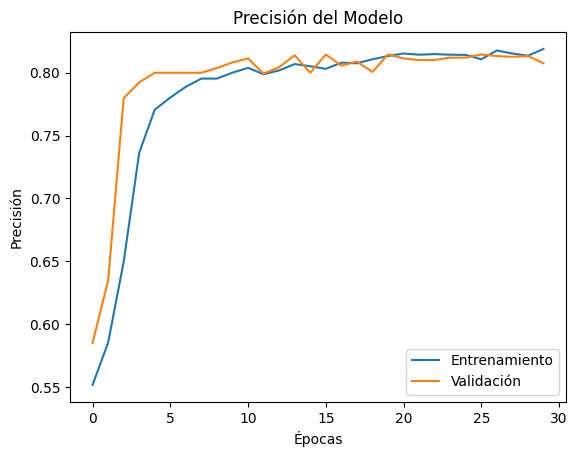

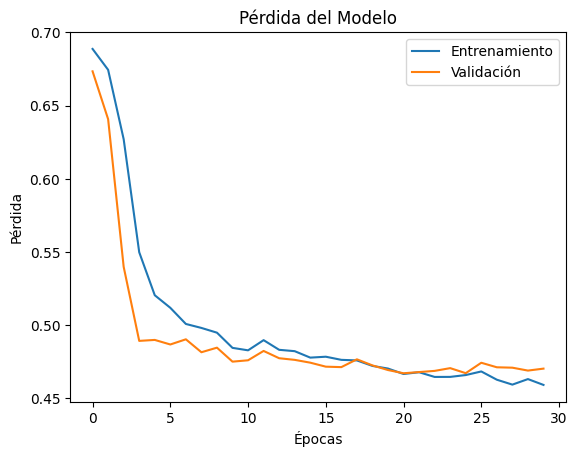

In [116]:
# Gráfica de precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Gráfica de pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


## Evaluar el modelo

In [117]:
# Predicciones del modelo
y_pred_prob = model.predict(X_test)  # Probabilidades
y_pred = (y_pred_prob > 0.5).astype(int)    # Convertir a clases binarias

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       876
           1       0.87      0.81      0.84      1098

    accuracy                           0.83      1974
   macro avg       0.83      0.83      0.83      1974
weighted avg       0.83      0.83      0.83      1974



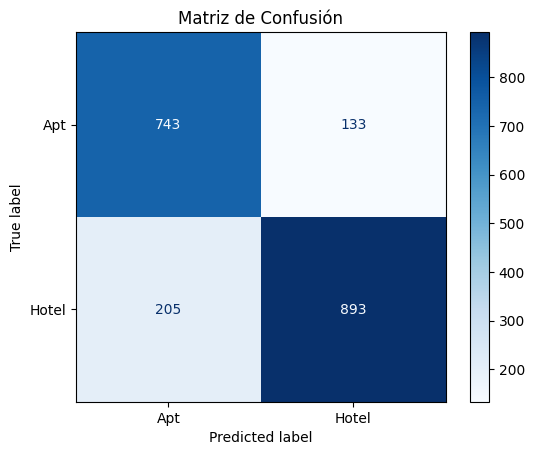

In [118]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Usar las clases dinámicamente para evitar errores
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Apt", "Hotel"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

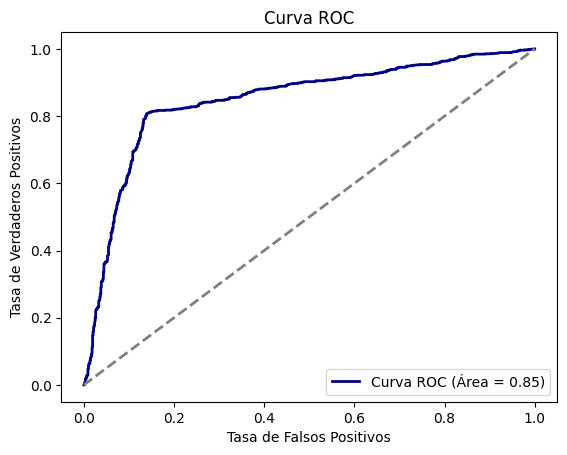

In [119]:
# Curva ROC
y_prob = y_pred_prob[:, 0]  # Probabilidades de la clase positiva
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='navy', lw=2, label=f'Curva ROC (Área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()